In [1]:
import matplotlib as mlt
import matplotlib.pyplot as plt

import numpy as np
import cv2
from utils import *
from scripts.histeq import equalize_image_histogram

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed, IntSlider

%matplotlib inline
mlt.rcParams['figure.figsize'] = (16,8)

---
### Notebook table of contents:

#### I. Loading and visualizing and image / Colors spaces
1. Loading the image as color or grayscale
2. Grayscale image
3. RGB image
4. HSV color space

#### II. Manipulating the colors, examples of adjustments
1. Histogram equalization (contrast adjustment) -> scripts/histeq.py
    * (1.1) Working on a grayscale image
    * (1.2) Intensity histogram equalization on a color image
    * (1.3) Adaptive histogram equalization
---

# Loading and visualizing an image / Color spaces

What happens when we load an image ? Two factors are to be taken into consideration : 
* The **color space** : we can load the image as grayscale, as RGB or BGR, as HSV...
* The **size** : the image will be loaded as it is but to visualize it we either will see it in its original size or smaller/bigger by using interpolation

## 1. Loading the image as color or grayscale

Let's roll with a cat photo from [here](https://consent.yahoo.com/collectConsent?sessionId=3_cc-session_f4281543-3d95-497d-9f03-283925dae4ca&lang=en-us&inline=false)

In [2]:
source_image = 'data\cat.jpeg'

Using open cv we can load the image as Grayscale or as BGR (additional dimension of depth). The resulting object is a numpy array of data type uint8 (unsigned 8 bit integer holding values between 0 and 255).

In [3]:
img_gray = cv2.imread(source_image, 0)
print("Grayscale image :\n data type = {}; matrix shape = {}".format(img_gray.dtype, img_gray.shape))

img_bgr = cv2.imread(source_image, 1)
print("BGR image :\n data type = {}; matrix shape = {}".format(img_bgr.dtype, img_bgr.shape))

# Flip dimension to have RGB for pyplot
img_rgb = np.flip(img_bgr, axis=2)

Grayscale image :
 data type = uint8; matrix shape = (463, 720)
BGR image :
 data type = uint8; matrix shape = (463, 720, 3)


Let's use pyplot to visualize the images in the notebook : they will be scaled to fit the notebook layout using interpolation, we'll talk about this more in detail in the next section.

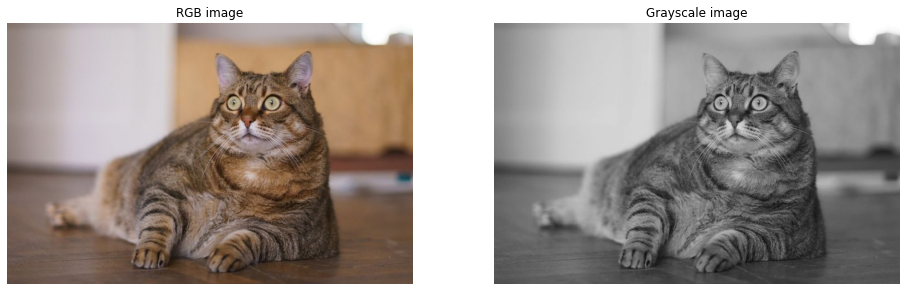

In [4]:
plt.subplot(1, 2, 1)
plt.title('RGB image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grayscale image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

## 2. Grayscale image

A grayscale image is a single matrix where each value represents the amount of light carried by the pixel, i.e. its intensity. A color photo can be converted to grayscale, there are different possible formulas designed to render the intensity information with maximal fidelity (more info [here](https://en.wikipedia.org/wiki/Grayscale)).

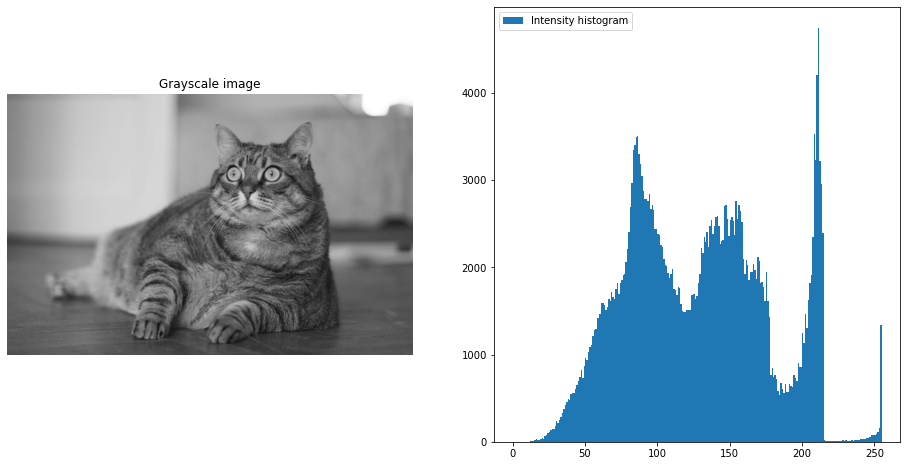

In [5]:
plt.subplot(1, 2, 1)
plt.title('Grayscale image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(img_gray.ravel(), range=(0,255), label='Intensity histogram', bins = np.arange(256))
plt.legend()
plt.show()

## 3. RGB image

RGB is a color space where various colors and rendered by a weighted sum of primary red, green and blue colors. It is one possibility among others, havings some biological motivations related to the human eye, and it does not allow the reproduction of *all* possible colors (more info [here](https://en.wikipedia.org/wiki/RGB_color_model)).

In [6]:
r_channel = img_rgb[:, :, 0]
b_channel = img_rgb[:, :, 1]
g_channel = img_rgb[:, :, 2]

We can visualize separate histograms for each channel as we did for the intensity of the grayscale image.

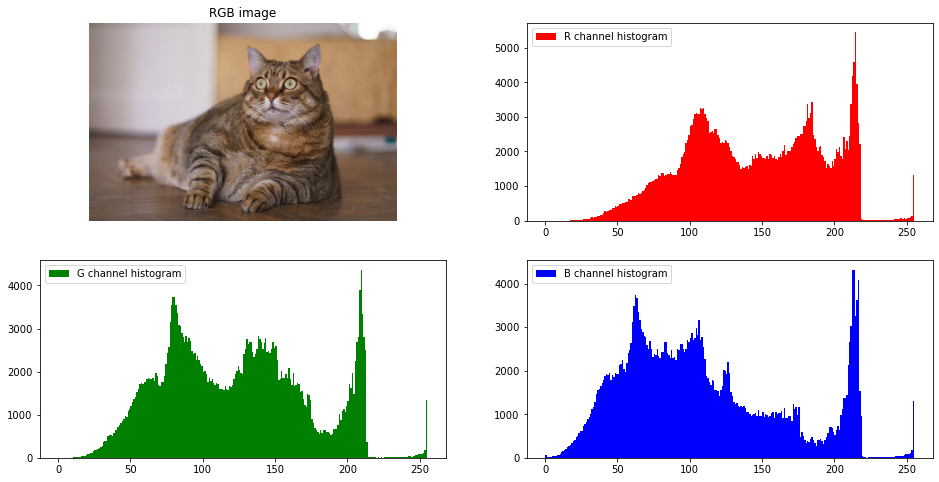

In [7]:
plt.subplot(2, 2, 1)
plt.title('RGB image')
plt.imshow(img_rgb, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(r_channel.ravel(), range=(0,255), color = 'r', label='R channel histogram', bins = np.arange(256))
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(b_channel.ravel(), range=(0,255), color = 'g', label='G channel histogram', bins = np.arange(256))
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(g_channel.ravel(), range=(0,255), color = 'b', label='B channel histogram', bins = np.arange(256))
plt.legend()
plt.show()

Here is an interactive piece of code to shift values on either of the channels (setting two of them to 0 will show the representation of the single one that's left). Unfortunately this does not work on github, so you need to run this notebook on your computer...

In [8]:
_ = interact(shift_rgb_values, 
             input_color_rgb = fixed(img_rgb), 
             show = fixed(True),
             red = (-255,255), 
             green = (-255,255), 
             blue = (-255,255))

interactive(children=(IntSlider(value=0, description='red', max=255, min=-255), IntSlider(value=0, description…

## 4. HSV Color space

RGB can be a suitable color space to visualize the image, however it becomes problematic when we want to do things such as tweeking the brightness or the saturation of the image without changing it's original colors. A more suitable color space exists for this : HSV (hue = colors, saturation, value = intensity; more info [here](https://en.wikipedia.org/wiki/HSL_and_HSV)).

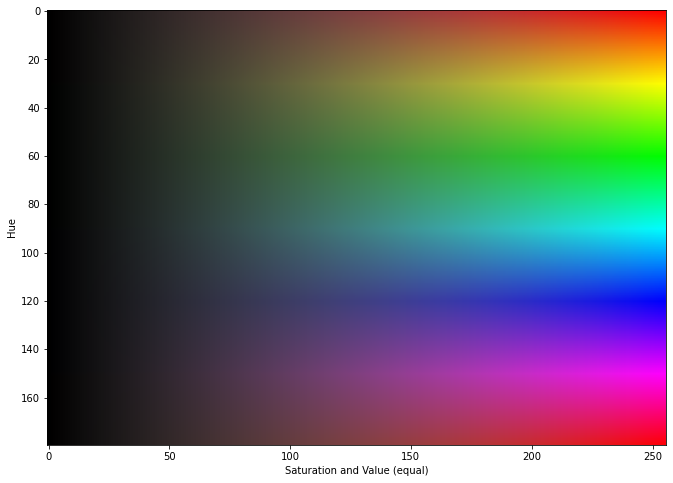

In [151]:
def create_hsv_band_for_h(hue_value):
    test_h = np.zeros(256, dtype = np.uint8) + hue_value
    test_s = np.arange(256, dtype = np.uint8)
    test_v = np.arange(256, dtype = np.uint8)
    return np.dstack((test_h, test_s, test_v))
                    
hsv_band = np.empty((180, 256, 3), dtype = np.uint8)
for h in np.arange(0, 180):
    hsv_band[h, :, :] = create_hsv_band_for_h(h)
    
plt.imshow(cv2.cvtColor(hsv_band, cv2.COLOR_HSV2RGB))
plt.xlabel("Saturation and Value (equal)")
plt.ylabel("Hue")
plt.show()    

In [9]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

To better understand the meaning of the channels we can visualize the effect of their individual modification on the original image.

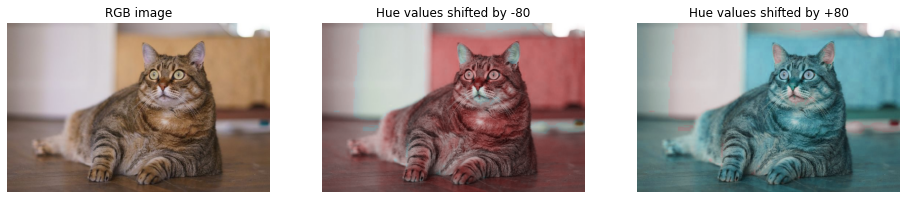

In [10]:
plt.subplot(1, 3, 1)
plt.title('RGB image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Hue values shifted by -80')
plt.imshow(shift_hsv_values(img_hsv, False, -80, 0, 0))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Hue values shifted by +80')
plt.imshow(shift_hsv_values(img_hsv, False, 80, 0, 0))
plt.axis('off')
plt.show()

Shifting the hue changes the colors of the image (without changing the intensity of anything else).

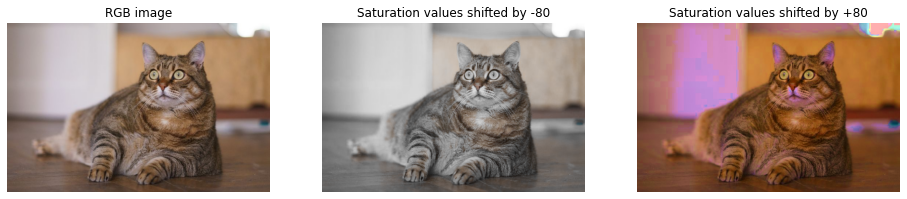

In [11]:
plt.subplot(1, 3, 1)
plt.title('RGB image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Saturation values shifted by -80')
plt.imshow(shift_hsv_values(img_hsv, False, 0, -80, 0))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Saturation values shifted by +80')
plt.imshow(shift_hsv_values(img_hsv, False, 0, 80, 0))
plt.axis('off')
plt.show()

Shifting the saturation changes the intensity of each color present in the image.

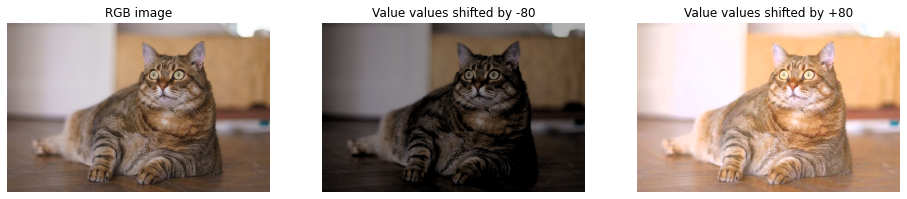

In [12]:
plt.subplot(1, 3, 1)
plt.title('RGB image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Value values shifted by -80')
plt.imshow(shift_hsv_values(img_hsv, False, 0, 0, -80))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Value values shifted by +80')
plt.imshow(shift_hsv_values(img_hsv, False, 0, 0, 80))
plt.axis('off')
plt.show()

Shifting the value changes the global intensity/brightness of the image.

Here is an ineractive cell to play around with the shift values (hue values are between 0 and 179 due to the structure of the color space). Again you need to run the notebook to be able to use this.

In [13]:
_ = interact(shift_hsv_values, 
             input_color_hsv = fixed(img_hsv),
             show = fixed(True),
             hue = (-179,179), 
             saturation = (-255,255), 
             value = (-255,255))

interactive(children=(IntSlider(value=0, description='hue', max=179, min=-179), IntSlider(value=0, description…

Let's keep in mind that other color spaces exist and may be suitable for given problems : different versions of RGB, CMYK, XYZ, etc.

---
# Manipulating the colors, examples of adjustments

## 1. Histogram equalization (contrast adjustment)

To illustrate this technique we will work with two example images, one grayscale and one color.
* Grayscale cartoon image from [here](https://stackoverflow.com/questions/48406578/adjusting-contrast-of-image-purely-with-numpy)
* Color tree image from [here](https://freepreset.net/low-contrast-photography-and-how-to-correct-it-in-post-processing.html)

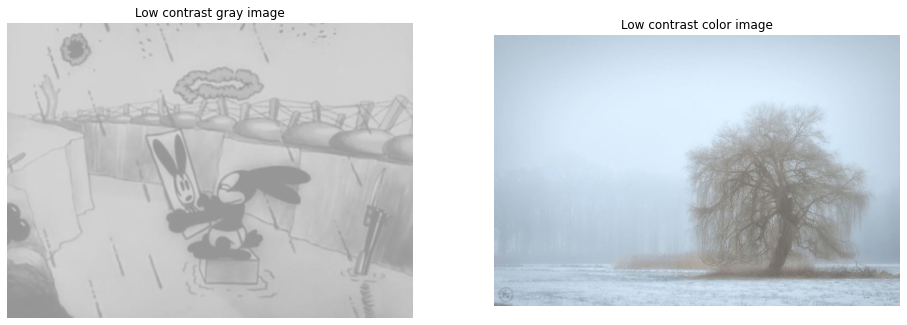

In [14]:
gray_lc_image_path = 'data\low_contrast.png'
gray_lc_image = cv2.imread(gray_lc_image_path, 0)

color_lc_image_path = 'data\low_contrast_color.jpg'
color_lc_image = cv2.imread(color_lc_image_path, 1)
color_lc_image_hsv = cv2.cvtColor(color_lc_image, cv2.COLOR_BGR2HSV)

#Visualize (add vmin=0, vmax=255 to imshow to remove auto scaling of intensity)
plt.subplot(1, 2, 1)
plt.title('Low contrast gray image')
plt.imshow(gray_lc_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Low contrast color image')
plt.imshow(np.flip(color_lc_image, axis=2), vmin=0, vmax=255)
plt.axis('off')
plt.show()

### 1.1 Working on a grayscale image

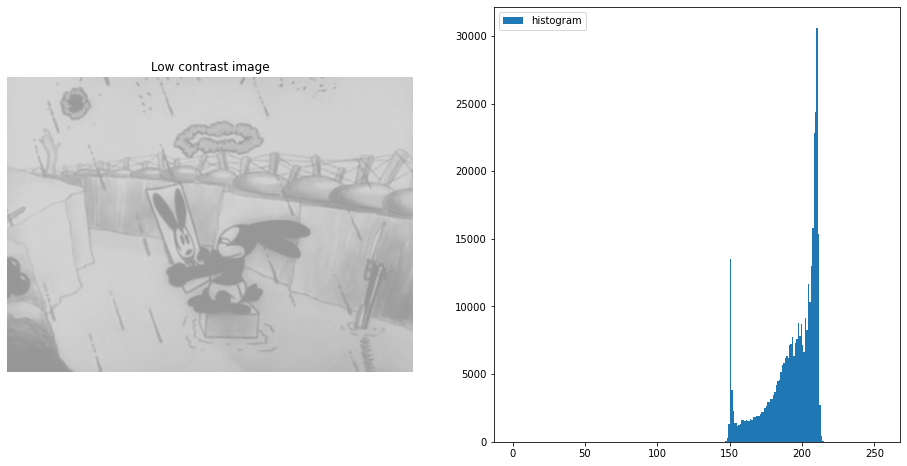

In [15]:
plt.subplot(1, 2, 1)
plt.title('Low contrast image')
plt.imshow(gray_lc_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(gray_lc_image.ravel(), range=(0,255), label='histogram', bins = np.arange(256))
plt.legend()
plt.show()

For a given image $x$, calculate the normalized histogram $p_x(i)$ : 
* For $p$ in $(0,..,L-1)$, $L$ being the number of possible intensity values, $p_x(i) =$ number of pixels with intensity $i$ / total number of pixels
* We obtain a 1D vector of length 256 : x axis = intensity value; y axis = number of pixels of that value

Calculate the normalized cumulative distribution function $cdf_x(i)$:
* For a given intensity value $i$, $cdf_x(i) = \sum_{j=0}^ip_x(i)$
* We obtain a 1D vector of length 256 : x axis = intensity value; y axis = probability of the intensity to be less or equal to that value

The intensity transformation function is defined as follows ([source](https://www.math.uci.edu/icamp/courses/math77c/demos/hist_eq.pdf) taken from the wiki page on histogram equalization) : $T(k)=floor((L-1)*cdf_x(k)$. See implementation in scripts/histeq.py.

In [16]:
# Get original image hisogram and cdf for plotting
gray_lc_image_hist = cv2.calcHist([gray_lc_image],[0],None,[256],[0,256])
gray_lc_image_cdf = np.cumsum(gray_lc_image_hist/gray_lc_image_hist.max())

# Calculate equalized image and get its histogram and cdf for plotting
gray_eq_image = equalize_image_histogram(gray_lc_image)
gray_eq_image_hist = cv2.calcHist([gray_eq_image],[0],None,[256],[0,256])
gray_eq_image_cdf = np.cumsum(gray_eq_image_hist/gray_eq_image_hist.max())

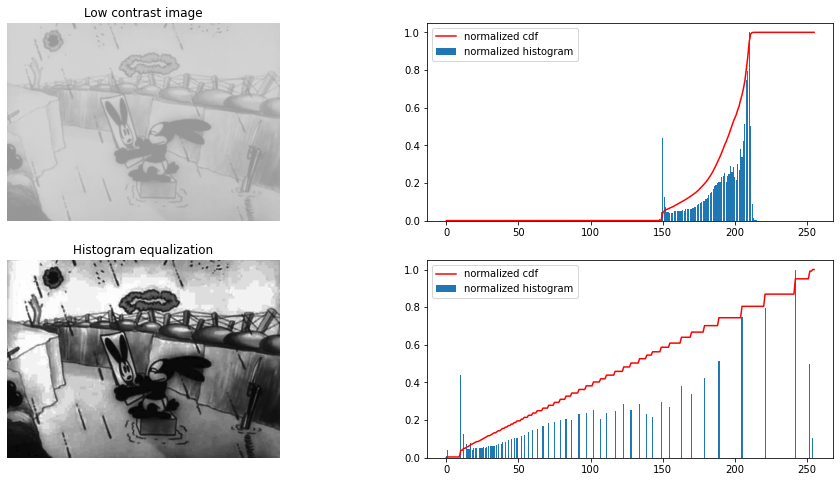

In [17]:
# Visualize
names = ['Low contrast image', 'Histogram equalization']
images = [gray_lc_image, gray_eq_image]
hists = [gray_lc_image_hist, gray_eq_image_hist]
cdfs = [gray_lc_image_cdf, gray_eq_image_cdf]

for i in range(2):
    
    plt.subplot(2, 2, i*2+1)
    plt.title(names[i])
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

    plt.subplot(2, 2, i*2+2)
    plt.bar(np.arange(256), hists[i][:,0]/hists[i].max(), label='normalized histogram')
    plt.plot(cdfs[i]/cdfs[i].max(), label='normalized cdf', color = 'r')
    plt.legend()

### 1.2 Intensity histogram equalization on a color image

Meddling with R, G, B channel values can result in a visual change in the image in terms of colors, brightness, saturation. Since here we only want to adjust the contrast without changing anything else, we need to generalize what we did in the case of gray image i.e. work on the intensity histogram only. Thus, we want to convert the image into HSV and equalize the histogram of the V channel (if we equalize the R, G, B histograms the resulting Hue and Saturation channels will be modified, and that's not what we want.

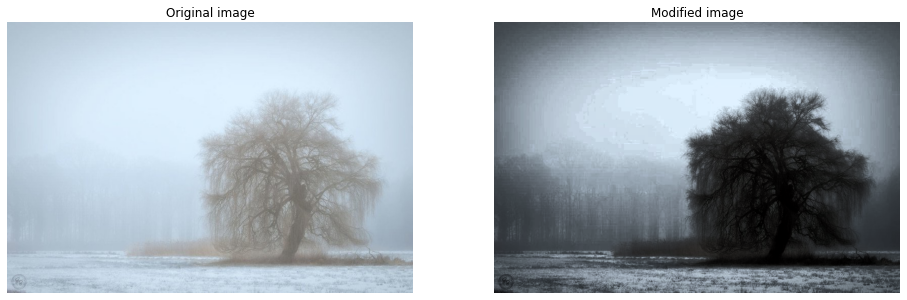

In [21]:
new_image_hsv = np.empty(color_lc_image_hsv.shape, dtype = np.uint8)
new_image_hsv[:, :, 0] = color_lc_image_hsv[:, :, 0]
new_image_hsv[:, :, 1] = color_lc_image_hsv[:, :, 1]
new_image_hsv[:, :, 2] = equalize_image_histogram(color_lc_image_hsv[:, :, 2]) # Apply method only here
new_image = cv2.cvtColor(new_image_hsv, cv2.COLOR_HSV2RGB)

plot_2_images(np.flip(color_lc_image, axis=2), new_image, "rgb", "Original image", "Modified image")

We can see below that we left the H and S channels intact, which avoided us a change in the colors of the image above.

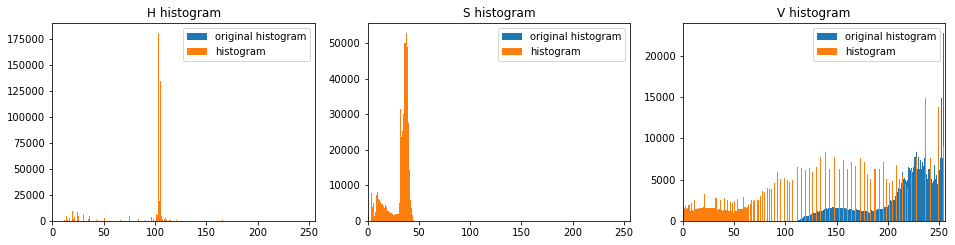

In [19]:
color_bgr = ['h','s','v']
for i,col in enumerate(color_bgr):
    plt.subplot(2, 3, i+1)
    plt.title("{} histogram".format(col.upper()))
    plt.hist(color_lc_image_hsv[:,:,i].ravel(), range=(0,255), label='original histogram', bins = np.arange(256))
    plt.hist(new_image_hsv[:,:,i].ravel(), range=(0,255), label='histogram', bins = np.arange(256))
    plt.xlim([0,256])
    plt.legend()
plt.show()

### 1.3. Adaptive histogram equalization ([source](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html))

The above method takes into account the global intensity of the picture, and we can see that even if the contrast if accentuated, it produces much noise on some areas, some are darkened too much, etc.

We can imagine that an "adaptive" method, i.e. a method which wich considers small locations of the image and performs histogram equalization there, would produce a cleaner result. This would be considered as *adaptive histogram equalization*

However if these small locations contain noise that noise would still be amplified, thus another technique is applied : *contrast limiting* ("To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization."). This is known as the [CLAHE algorithm](https://en.wikipedia.org/wiki/Adaptive_histogram_equalization#Contrast_Limited_AHE) (contrast limited adaptive histogram equalization).

Finally there is a final step of interpolation to remove artifacts.

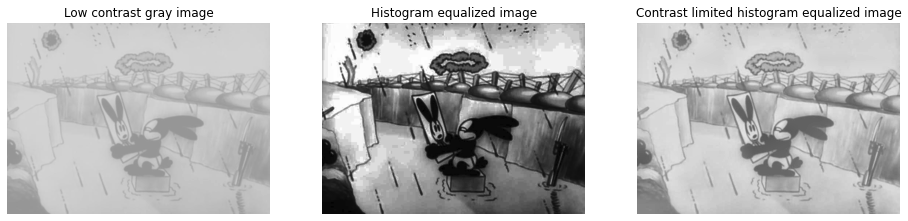

In [24]:
plt.subplot(1, 3, 1)
plt.title('Low contrast gray image')
plt.imshow(gray_lc_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Histogram equalized image')
plt.imshow(gray_eq_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Contrast limited histogram equalized image')
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(gray_lc_image)
plt.imshow(cl1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

We can see that the image looks better ! Obviously depending on the input image, the amount of uniformity or noise, various methods will be more or less efficient. For instance the ordinary HE "works well when the distribution of pixel values is similar throughout the image", but when it's not the the case AHE can be more adapted. 

HE and CLAHE are available with the open cv library. There are more variants of HE that are being developed (we saw HE, and briefly AHE and CLAHE): Dynamic Histogram Equalization (DHE), Brightness Preserving Dynamic Histogram Equalization (BPDHE), Dualistic  Sub  Image  Histogram  Equalization  (DSIHE), ...

## 2. Hue thresholding

Another example of manipulation that we can do are thresholding operations : we can threshold the hue values to keep only a single range of hue on the image and put the rest to grayscale, or to kind of detect pixels in the same hue range on an image. We can use the <code>cv2.inRange</code> function for this. 

Let's run with the "red" color example : want to treshold the H,S,V channels to isolate the red color. The hue value for "red" is close to 0 and to 180, the saturation and value needs to be high to avoid going into the black color.

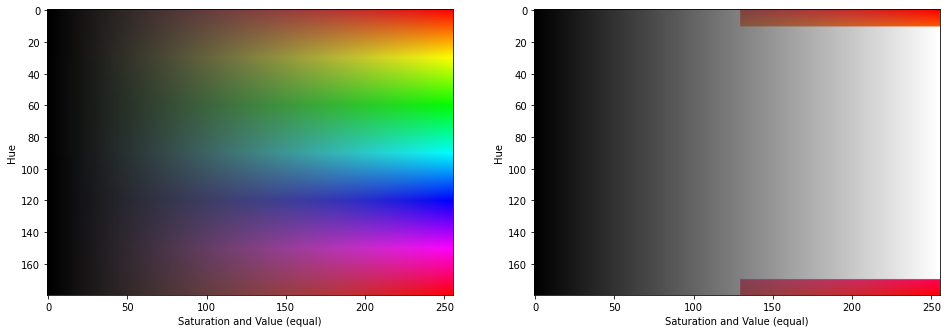

In [167]:
hsv_band_thresh = hsv_band.copy()
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(hsv_band_thresh, cv2.COLOR_HSV2RGB))
plt.xlabel("Saturation and Value (equal)")
plt.ylabel("Hue")


mask1 = cv2.inRange(hsv_band_thresh, (0, 130, 130), (10, 255, 255))
mask2 = cv2.inRange(hsv_band_thresh, (170, 130, 130), (180, 255, 255))
mask = cv2.bitwise_or(mask1, mask2)
hsv_band_thresh[:, :, 0] *= mask // 255
hsv_band_thresh[:, :, 1] *= mask // 255

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(hsv_band_thresh, cv2.COLOR_HSV2RGB))
plt.xlabel("Saturation and Value (equal)")
plt.ylabel("Hue")
plt.show() 

We can see that it goes pretty quickly into orange, so personally I choose to keep hue between 0 et 2. The S,V values need to be kept high in order to avoid going into the black. We would need a high threshold if we want to keep only the bright red, otherwise probably the last quarter is a good choice. However we can see that hard thresolding like this is not ideal because in the HSV map colors are not rectangular areas, they blend into each other at different S and V values, thus our recangles capture a bit of orange, a bit of pink, and maybe miss out some red.

In [195]:
def keep_hue_in_range(image):
    
    # Convert to useful color spaces
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Create thresholding mask, to parametrize
    mask1 = cv2.inRange(image_hsv, (0, 80, 80), (10, 255, 255))
    mask2 = cv2.inRange(image_hsv, (170, 80, 80), (180, 255, 255))
    
    mask = cv2.bitwise_or(mask1, mask2) // 255
    mask_inverse = cv2.bitwise_not(mask) // 255
    
    # Apply mask on image, move everything else to gray
    image_hsv[:, :, 0] *= mask
    image_hsv[:, :, 1] *= mask
    image_hsv[:, :, 2] *= mask
    
    # Use the grayscale image for all the rest of the zone
    image_hsv[:, :, 2] = image_gray * mask_inverse + image_hsv[:, :, 2] 

    return cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)

In [196]:
cap = cv2.VideoCapture(0)
while(True):
    ret, frame = cap.read()
    processed_frame = keep_hue_in_range(frame)
    
    cv2.imshow('Canny edge detection', processed_frame)
    # Press Q to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()